In [1]:
using Distributions
using Plots

*Repetition codes* are a coding system written $R_N$, where $N$ is the number of times each bit is repeated.

# Exercise 1.2

Show that the error probability is reduced by the use of $R_3$ by computing the error probability of this code for a binary symmetric channel with noise level $f$.

When using $R_3$, decoding errors only happen if 2 or 3 bits flip.

The binomial distribution tells us how likely $k$ bit flips are in $n$ bits, with noise level $f$.

$
\textrm{binomial}(k|n,f) = {n \choose k} \ f^k \ (1-f)^{n-k}
$

So the probability of 2 or 3 bits flipping is: $\textrm{binomial}(2|3,f) + \textrm{binomial}(3|3,f)$

$
\textrm{binomial}(2|3,f) + \textrm{binomial}(3|3,f)
\\
= {3 \choose 2} \ f^2 \ (1-f)^{3-2} + {3 \choose 3} \ f^3 \ (1-f)^{3-3}
\\
= 3f^2 \ (1-f) + f^3
\\
= 3f^2 - 3f^3 + f^3
\\
= 3f^2 - 2f^3
$

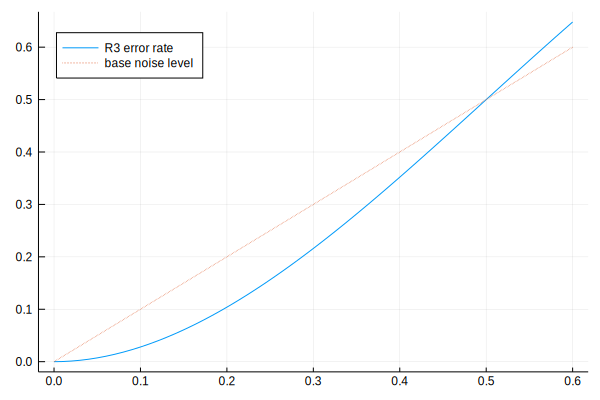

In [2]:
domain = 0:0.01:0.6
plot(domain, f -> 3f^2 - 2f^3, label="R3 error rate", legend=:topleft)
plot!(domain, f -> f, label="base noise level", linestyle=:dot)

Note: A noise level of $f = 0.5$ would mean the channel is completely random.

# Exercise 1.3

The probability of error of $R_N$ is:

$$
p_b = \sum_{n=(N+1)/2}^N \ {N \choose n} \ f^n \ (1-f)^{N-n}
$$

Assuming $f = 0.1$, which of the terms in this sum is the biggest? How much bigger is it than the second-biggest term?

In words, the probability of error of $R_N$ is the probability that more than half of the bits are flipped. Since $f < 0.5$, the most likely failure case is that just over half the bits were flipped, and the second most likely error case is that just over half plus one bits flipped, etc. This is what is expressed by the $p_b$ equation.

It appears:

$$
\lim_{N \to \infty}
\frac{
    {N \choose n}
}{
    {N \choose n+1}
}
= 1
$$

So, as $N$ becomes large, the term ${N \choose n}$ remains roughly constant.

In [3]:
map(3:2:51) do N
    n = Int((N+1)/2)
    b_max = binomial(N, n)
    b_next = binomial(N, n+1)
    N, b_max / b_next
end

25-element Array{Tuple{Int64,Float64},1}:
 (3, 3.0)                
 (5, 2.0)                
 (7, 1.6666666666666667) 
 (9, 1.5)                
 (11, 1.4)               
 (13, 1.3333333333333333)
 (15, 1.2857142857142858)
 (17, 1.25)              
 (19, 1.2222222222222223)
 (21, 1.2)               
 (23, 1.1818181818181819)
 (25, 1.1666666666666667)
 (27, 1.1538461538461537)
 (29, 1.1428571428571428)
 (31, 1.1333333333333333)
 (33, 1.125)             
 (35, 1.1176470588235294)
 (37, 1.1111111111111112)
 (39, 1.105263157894737) 
 (41, 1.1)               
 (43, 1.0952380952380953)
 (45, 1.0909090909090908)
 (47, 1.0869565217391304)
 (49, 1.0833333333333333)
 (51, 1.08)              

It appears:

$$
\lim_{n \to \infty}
\frac{
    f^n + (1-f)^{N-n}
}{
    f^{n+1} + (1-f)^{N-(n+1)}
}
= f^{-1} \ (1-f)
$$

So, for $f = 0.1$, it is 9 times more likely that just over half the bits will flip, than that just over half the bits plus one will flip.

Thus, the first term in the following sum is at least 9 time larger than any other term in the sum.

$$
\sum_{n=(N+1)/2}^N \ f^n \ (1-f)^{N-n}
$$

In [4]:
f = 0.1
map(1:2:31) do N
    n = Int((N+1)/2)
    num = f^n * (1-f)^(N-n)
    den = f^(n+1) * (1-f)^(N-(n+1))
    num / den
end

16-element Array{Float64,1}:
 8.999999999999998
 9.0              
 9.000000000000002
 9.0              
 8.999999999999998
 9.0              
 8.999999999999998
 9.0              
 9.0              
 8.999999999999998
 9.0              
 8.999999999999998
 9.0              
 9.0              
 9.0              
 8.999999999999998

In [5]:
f^-1 * (1-f)

9.0

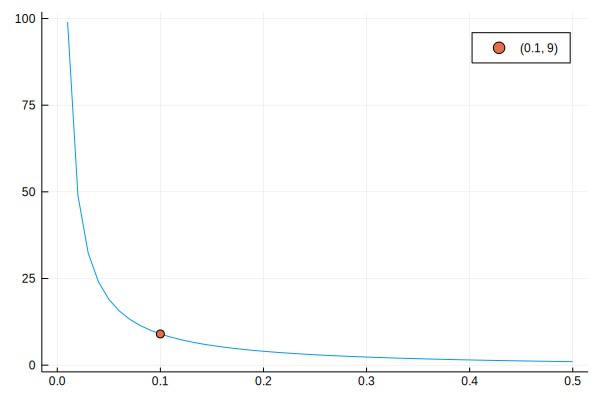

In [6]:
plot(0:0.01:0.5, f -> f^-1 * (1-f), label="")
scatter!((0.1, 9), label="(0.1, 9)")

It appears that the sum $p_b$ is dominated by the largest term for small values of $f$. When $f = 0.1$ the largest term is about 9 times larger than the second largest term.

When $f = 0.1$, how many repetitions are required to get the error rate down to $10^{-15}$?

Looking again at our equation for the probability of error of $R_N$:

$$
p_b = \sum_{n=(N+1)/2}^N \ {N \choose n} \ f^n \ (1-f)^{N-n}
$$

As $N$ increases the term ${N \choose n}$ increases and the term $f^n \ (1-f)^{N-n}$ decreases.

It appears:

$$
\lim_{N \to \infty}
\frac{
    {N+2 \choose n+2}
}{
    {N \choose n}
}
= 4
$$

Thus, when we increase $N$ by 2, the term ${N \choose n}$ increases by 4.

In [7]:
binomial_terms = map(n -> binomial(Int(n), Int((n+1)/2)), 1:2:51)

26-element Array{Int64,1}:
               1
               3
              10
              35
             126
             462
            1716
            6435
           24310
           92378
          352716
         1352078
         5200300
        20058300
        77558760
       300540195
      1166803110
      4537567650
     17672631900
     68923264410
    269128937220
   1052049481860
   4116715363800
  16123801841550
  63205303218876
 247959266474052

In [8]:
binomial_growth = map(i -> binomial_terms[i+1] / binomial_terms[i], 1:length(binomial_terms)-1)

25-element Array{Float64,1}:
 3.0               
 3.3333333333333335
 3.5               
 3.6               
 3.6666666666666665
 3.7142857142857144
 3.75              
 3.7777777777777777
 3.8               
 3.8181818181818183
 3.8333333333333335
 3.8461538461538463
 3.857142857142857 
 3.8666666666666667
 3.875             
 3.8823529411764706
 3.888888888888889 
 3.8947368421052633
 3.9               
 3.9047619047619047
 3.909090909090909 
 3.9130434782608696
 3.9166666666666665
 3.92              
 3.923076923076923 

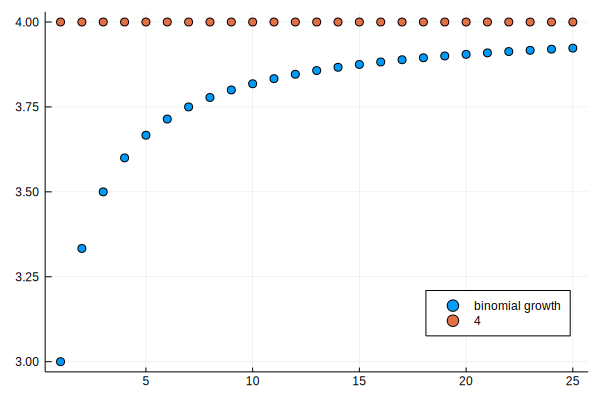

In [9]:
scatter(binomial_growth, label="binomial growth", legend=:bottomright)
scatter!(ones(length(binomial_growth)) * 4, label="4")

${N+2 \choose n+1}$ is about 4 times larger than ${N \choose n}$.

For $f = 0.1$, $f^1\ (1-f)^{2-1}$ divides by about 11 for $R_{N+2}$.

So in $R_N$, increasing $N$ by 2 multiplies the error rate by about $4/11$.

We are looking for an error rate of $10^{-15}$.

In [10]:
estimate_r(f, target_error_rate) = log(4 * f * (1-f), target_error_rate) * 2

@time estimate_r(0.1, 10^-15)

  0.008967 seconds (8.44 k allocations: 483.552 KiB)


67.61363327915772

It would take roughly $R_{67}$ to reach $10^{-15}$ error rate.

Let's just brute force it.

In [11]:
function error_rate(f, r_n)
    sum(pdf(Binomial(r_n, f), n) for n in (r_n+1)/2:r_n)
end

@time error_rate(0.1, 3)

  0.057593 seconds (126.71 k allocations: 6.115 MiB)


0.028000000000000008

In [12]:
function calculate_r(f, target_error_rate)
    for r_n in 1:2:1001
        if error_rate(f, r_n) <= target_error_rate
            return r_n
        end
    end
end

@time calculate_r(0.1, 10^-15)

  0.013540 seconds (32.09 k allocations: 1.858 MiB)


63

The exact answer is $R_{63}$.

Let's try some other numbers for fun.

In [13]:
@time estimate_r(0.2, 10^-15)

  0.000038 seconds (6 allocations: 192 bytes)


154.7827673777426

In [14]:
@time calculate_r(0.2, 10^-15)

  0.000398 seconds (5 allocations: 176 bytes)


141

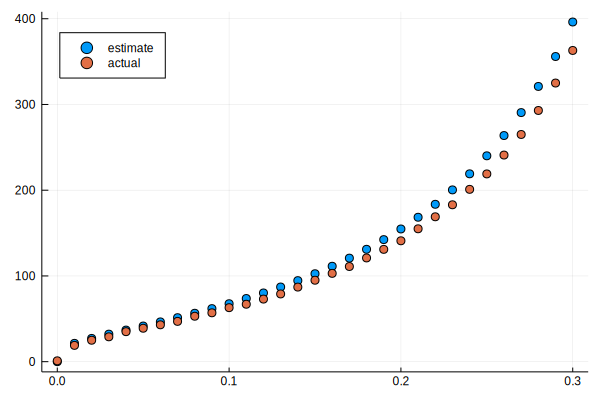

In [15]:
scatter(0:0.01:0.3, f -> estimate_r(f, 10^-15), label="estimate", legend=:topleft)
scatter!(0:0.01:0.3, f -> calculate_r(f, 10^-15), label="actual")